## Getting Started with Networkx

NetworkX documentation: https://networkx.github.io/documentation/latest/

In [2]:
# sudo pip install networkx

import networkx as nx

g = nx.Graph()
g

In [3]:
print g.nodes()
print g.edges()

[]
[]


In [4]:
import numpy as np

g.add_node(1)
print g.nodes()

[1]


In [5]:
g.add_nodes_from([2,3])
print g.nodes()

[1, 2, 3]


In [6]:
range(4,11,1)

[4, 5, 6, 7, 8, 9, 10]

In [7]:
g.add_nodes_from(range(4,11,1))
print g.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Now let's add edges

In [9]:
g.add_edge(1,2)

In [11]:
print g.edges()
print g.edge[1]

[(1, 2)]
{2: {}}


In [12]:
g.add_edges_from([(2,3),(3,4)])
for i in range(4,10,1):
    g.add_edge(i,i+1)
g.edges()

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]

In [13]:
print 'nodes:',g.number_of_nodes()
print 'edges:',g.number_of_edges()

nodes: 10
edges: 9


We can annotate nodes and edges with attributes

In [14]:
g[1][2]['weight'] = 1.0
g[1][2]

{'weight': 1.0}

In [30]:
g.node[1]['name']='Gilad'
g.node[1]['color']='Blue'
g.node[1]['weight']=20

In [31]:
print g.node[1]
print g[1]

{'color': 'Blue', 'name': 'Gilad', 'weight': 20}
{2: {'weight': 1.0}}


In [32]:
for i in range(1,10,1):
    g[i][i+1]['weight'] = i*1.0

# shows all edges + attributes (same as running g[1])
print 'edge info:',g.edge[1]
print 'node info:',g.node[1]

edge info: {2: {'weight': 1.0}}
node info: {'color': 'Blue', 'name': 'Gilad', 'weight': 20}


And it is easy to iterate over the nodes and edges of a graph

In [36]:
# naming every node in the graph
names = ['one','two','three','four','five','six','seven','eight','nine','ten']
for node in g.nodes():
    g.node[node]['name'] = names[node-1]

In [38]:
# print all edge weights
for u,v in g.edges():
    print g.node[u]['name'],u,'->', v, g[u][v]['weight']

one 1 -> 2 1.0
two 2 -> 3 2.0
three 3 -> 4 3.0
four 4 -> 5 4.0
five 5 -> 6 5.0
six 6 -> 7 6.0
seven 7 -> 8 7.0
eight 8 -> 9 8.0
nine 9 -> 10 9.0


In [39]:
# find neighbors of a particular node
for node in g.nodes():
    print node, g.neighbors(node)

1 [2]
2 [1, 3]
3 [2, 4]
4 [3, 5]
5 [4, 6]
6 [5, 7]
7 [8, 6]
8 [9, 7]
9 [8, 10]
10 [9]


## Class Graph

In [77]:
# handy library that helps us get all combinations of pairs, given an array of items
from itertools import combinations

arr = [1,2,3,4,5]
for i,j in combinations(arr,2):
    print i,j

1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5


In [78]:
g = nx.Graph()

floc = 'data/student_classes.txt'
f = open(floc)

for row in f:
    r = row.strip().split(',')
    class_name = r[0]
    class_students = r[1:]
    print class_name, class_students
    
    # add nodes
    for student in class_students:
        if student!='':
            g.add_node(student)
        
    # add edges
    for s1,s2 in combinations(class_students,2):
        g.add_edge(s1,s2)

Programming from A ['Nikita', 'Ruta', 'Serena', 'RebeccaR', 'Ondina', 'Daniel', 'RebeccaL', 'Joakim', 'Leslie']
Programming Design ['Dana', 'Osama', 'Jamie']
Learning Machines ['Leon', 'Nicole', 'Daniel', 'Yuchi', 'Joakim', 'Jamie', 'Ondina', 'Melanie', 'Ruta', 'Dhruv', 'Allison']
Digital Imaging ['Osama', 'RebeccaL']
Data Art ['Serena', 'Jennifer', 'RebeccaR']
Live Web ['Leon', 'Melanie', 'Joakim', 'Ondina', 'RebeccaL']
Physical Computing ['Jasmine', 'Anastasios']
Project Development ['RebeccaR', 'Jennifer']
Understanding Netw ['Jamie', 'Nicole', 'Jennifer', 'Allison', 'Leon', 'Melanie', 'Dhruv']
Testing Tomorrow ['RebeccaL', 'Leslie']
DIY-VR ['Allison', 'Serena']
Hacking Story Fram ['Dana', 'Ruta', 'Leslie', 'Allison', 'RebeccaR']
New Interfaces for ['Daniel', 'Nikita']
Alt Docs ['Serena', 'Dhruv', 'Leslie']
Designing for Data ['Joakim', 'Osama', 'Ondina', 'Leslie']


In [46]:
# all our nodes
print g.nodes(), len(g.nodes())

['Nicole', 'Anastasios', 'Jasmine', 'Ondina', 'Yuchi', 'Serena', 'Allison', 'Jamie', 'Dhruv', 'RebeccaR', 'Nikita', 'Melanie', 'Leon', 'Jennifer', 'Osama', 'Joakim', 'Ruta', 'Daniel', 'Leslie', 'RebeccaL', 'Dana'] 21


In [47]:
# all our edges
print g.edges()

[('Nicole', 'Ondina'), ('Nicole', 'Yuchi'), ('Nicole', 'Allison'), ('Nicole', 'Jamie'), ('Nicole', 'Ruta'), ('Nicole', 'Leon'), ('Nicole', 'Jennifer'), ('Nicole', 'Joakim'), ('Nicole', 'Melanie'), ('Nicole', 'Daniel'), ('Nicole', 'Dhruv'), ('Anastasios', 'Jasmine'), ('Ondina', 'Jamie'), ('Ondina', 'Yuchi'), ('Ondina', 'Serena'), ('Ondina', 'Allison'), ('Ondina', 'Dhruv'), ('Ondina', 'RebeccaR'), ('Ondina', 'Nikita'), ('Ondina', 'Melanie'), ('Ondina', 'Leon'), ('Ondina', 'Osama'), ('Ondina', 'Joakim'), ('Ondina', 'Ruta'), ('Ondina', 'Daniel'), ('Ondina', 'Leslie'), ('Ondina', 'RebeccaL'), ('Yuchi', 'Allison'), ('Yuchi', 'Jamie'), ('Yuchi', 'Ruta'), ('Yuchi', 'Leon'), ('Yuchi', 'Joakim'), ('Yuchi', 'Melanie'), ('Yuchi', 'Daniel'), ('Yuchi', 'Dhruv'), ('Serena', 'Allison'), ('Serena', 'RebeccaR'), ('Serena', 'Nikita'), ('Serena', 'Jennifer'), ('Serena', 'Joakim'), ('Serena', 'Ruta'), ('Serena', 'Daniel'), ('Serena', 'Leslie'), ('Serena', 'RebeccaL'), ('Serena', 'Dhruv'), ('Allison', 'Rebe

Populating the interactive namespace from numpy and matplotlib


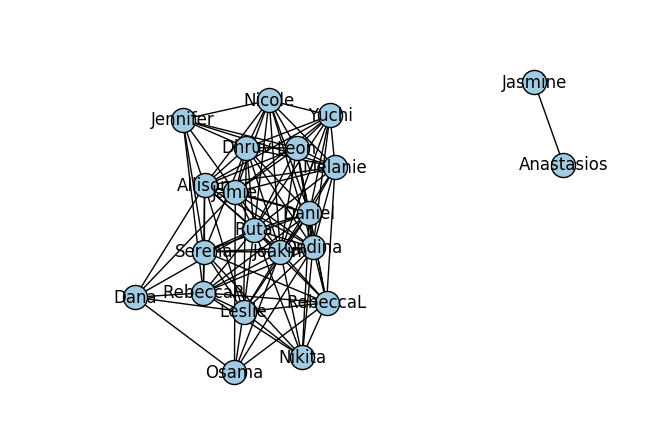

In [49]:
%pylab inline
nx.draw(g, node_color='#A0CBE2', with_labels=True)

### Centrality Measures

Documentation of various centrality measures here - https://networkx.github.io/documentation/latest/reference/algorithms.centrality.html

In [50]:
nx.degree(g)

{'Allison': 15,
 'Anastasios': 1,
 'Dana': 6,
 'Daniel': 15,
 'Dhruv': 13,
 'Jamie': 13,
 'Jasmine': 1,
 'Jennifer': 8,
 'Joakim': 16,
 'Leon': 12,
 'Leslie': 12,
 'Melanie': 12,
 'Nicole': 11,
 'Nikita': 8,
 'Ondina': 16,
 'Osama': 6,
 'RebeccaL': 11,
 'RebeccaR': 11,
 'Ruta': 16,
 'Serena': 11,
 'Yuchi': 10}

In [51]:
# list of frequency of each degree value
y = nx.degree_histogram(g)
y

[0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 4, 3, 2, 0, 2, 3]

In [52]:
# needed to plot the histogram -> effectively number of "buckets"
x = range(len(nx.degree_histogram(g)))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

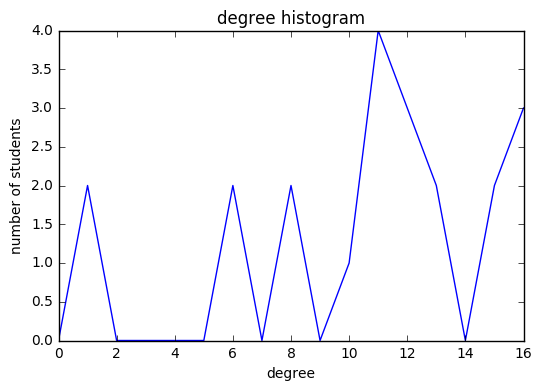

In [53]:
plot(x,y)
title('degree histogram')
ylabel('number of students')
xlabel('degree')

In [54]:
# degree centrality for node v is the fraction of nodes it is connected to
deg = nx.degree_centrality(g)
deg

{'Allison': 0.75,
 'Anastasios': 0.05,
 'Dana': 0.30000000000000004,
 'Daniel': 0.75,
 'Dhruv': 0.65,
 'Jamie': 0.65,
 'Jasmine': 0.05,
 'Jennifer': 0.4,
 'Joakim': 0.8,
 'Leon': 0.6000000000000001,
 'Leslie': 0.6000000000000001,
 'Melanie': 0.6000000000000001,
 'Nicole': 0.55,
 'Nikita': 0.4,
 'Ondina': 0.8,
 'Osama': 0.30000000000000004,
 'RebeccaL': 0.55,
 'RebeccaR': 0.55,
 'Ruta': 0.8,
 'Serena': 0.55,
 'Yuchi': 0.5}

In [55]:
# top 10 most central students
sorted(deg.items(), key=lambda x:-x[1])[:10]

[('Joakim', 0.8),
 ('Ondina', 0.8),
 ('Ruta', 0.8),
 ('Allison', 0.75),
 ('Daniel', 0.75),
 ('Jamie', 0.65),
 ('Dhruv', 0.65),
 ('Leon', 0.6000000000000001),
 ('Melanie', 0.6000000000000001),
 ('Leslie', 0.6000000000000001)]

In [56]:
# betweenness centrality is equal to the number of shortest paths from all vertices to all others 
# that pass through that node. A node with high betweenness centrality has a large influence on the transfer
# of items through the network, under the assumption that item transfer follows the shortest paths.

betweenness = nx.betweenness_centrality(g)
print betweenness

{'Anastasios': 0.0, 'RebeccaR': 0.018178780284043444, 'Jamie': 0.03210526315789473, 'Yuchi': 0.0, 'Serena': 0.01142439431913116, 'Joakim': 0.03800960735171261, 'Nikita': 0.0, 'Ondina': 0.03800960735171261, 'Jasmine': 0.0, 'Ruta': 0.039413116123642435, 'Leon': 0.008573517126148705, 'Jennifer': 0.006610275689223058, 'Osama': 0.004479949874686717, 'Allison': 0.03149122807017543, 'Melanie': 0.008573517126148705, 'Daniel': 0.02388680033416875, 'Leslie': 0.02002088554720134, 'Dhruv': 0.012437343358395988, 'Dana': 0.004392230576441103, 'Nicole': 0.003508771929824561, 'RebeccaL': 0.014674185463659149}


In [57]:
sorted(betweenness.items(), key=lambda x:-x[1])[:10]

[('Ruta', 0.039413116123642435),
 ('Joakim', 0.03800960735171261),
 ('Ondina', 0.03800960735171261),
 ('Jamie', 0.03210526315789473),
 ('Allison', 0.03149122807017543),
 ('Daniel', 0.02388680033416875),
 ('Leslie', 0.02002088554720134),
 ('RebeccaR', 0.018178780284043444),
 ('RebeccaL', 0.014674185463659149),
 ('Dhruv', 0.012437343358395988)]

112


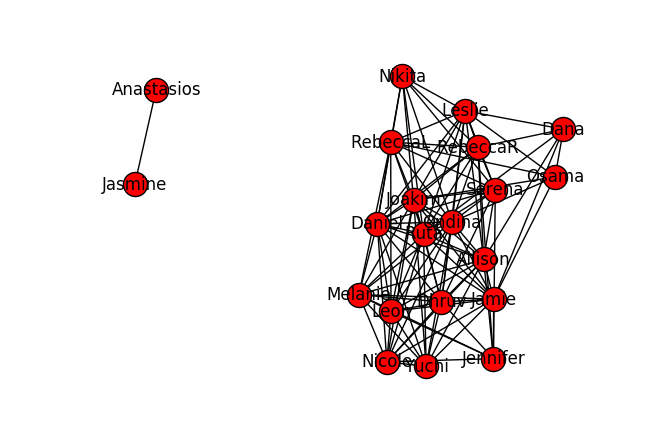

In [106]:
# Calculating positioning of nodes, so that we can plot the next graphs in exactly the same place

pos=nx.spring_layout(g)
nx.draw(g, pos, with_labels=True) 
print g.number_of_edges()

In [107]:
# Betweenness Centrality -> what is this calculating?

eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
print eb_il[0][0]

('Jamie', 'Osama')


In [109]:
components = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
for c in components:
    print c.number_of_nodes()

19
2


In [110]:
nx.write_gexf(g, 'class_graph.gexf')

## Assignment

1. Download Gephi (https://gephi.org/) and load our class graph into it. Explore various statistics and layouts. Find anything intereseting? Can you identify clusters based on Modularity (screenshot below)? Why people clustered this way? 

2. Pull Twitter data that can help with the portrait of your target. Where are graphs helpful? What are you able to do, and what would you like to do? Where are there limitations?

<img src="itp_class_graph.jpg" />